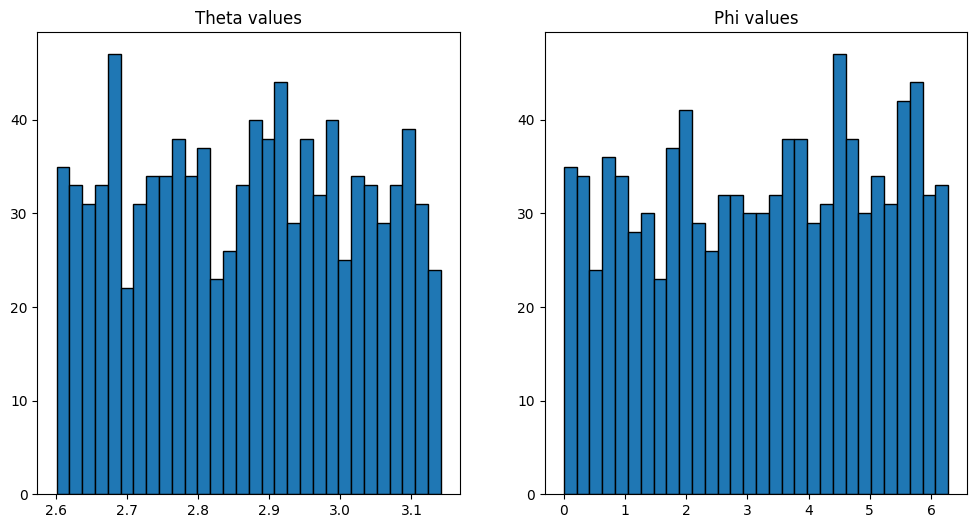

In [3]:
import math
import random

h = 5
r = 3
thetaMin = math.pi - math.atan(r / h)
thetaMax = math.pi

import matplotlib.pyplot as plt
import numpy as np

# 生成一大堆随机数
num_samples = 1000
theta_values = np.random.uniform(thetaMin, thetaMax, num_samples)
phi_values = np.random.uniform(0, 2*np.pi, num_samples)

# 计算方向
directions = np.array([np.sin(theta_values) * np.cos(phi_values), 
                       np.sin(theta_values) * np.sin(phi_values), 
                       np.cos(theta_values)]).T

# 绘制 theta 和 phi 的直方图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(theta_values, bins=30, edgecolor='black')
plt.title('Theta values')

plt.subplot(1, 2, 2)
plt.hist(phi_values, bins=30, edgecolor='black')
plt.title('Phi values')

plt.show()